# Context

SZE bank want to identified the loan application to filter the people who can be granted loans and need to be rejected is a tedious and time-consuming process. So, I am going to help the SZE bank to make a machine learning model to predict whether the people will get a loan or not.

**Challenge:**
- Checking any missing values ✅
- Data Visualization for Numerical variables ✅
- Data Visualization for Categorical variables ✅
- Correlation matrix for numerical variables ✅
- Imputing Null Values with Imputer ✅
- Data Encoding ✅
- Modelling ✅


In [ ]:
#Import library
import pandas as pd
import numpy as np

#Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, auc, roc_auc_score 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
loan_data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Loan%20Prediction")
loan_data = loan_data.iloc[:,2:]
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


## Data Prepartion

In [ ]:
null_val = pd.DataFrame(loan_data.dtypes).T.rename(index={0:'Columns Type'})
null_val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Columns Type,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,int64


In [ ]:
null_val = null_val.append(pd.DataFrame(loan_data.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null_val

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Columns Type,object,object,object,object,object,object,int64,float64,float64,float64,float64,object,int64
Amount of Null Values,0,10,1,9,0,29,0,0,16,13,43,0,0


In [ ]:
null_val = null_val.append(pd.DataFrame(round(loan_data.isnull().sum()/loan_data.shape[0]*100,2)).T.rename(index={0:'Percentage null values'}))
null_val.T

,Columns Type,Amount of Null Values,Percentage null values
Loan_ID,object,0,0.0
Gender,object,10,2.04
Married,object,1,0.2
Dependents,object,9,1.83
Education,object,0,0.0
Self_Employed,object,29,5.91
ApplicantIncome,int64,0,0.0
CoapplicantIncome,float64,0,0.0
LoanAmount,float64,16,3.26
Loan_Amount_Term,float64,13,2.65


In [ ]:
def checking_null_values(dataset):
  """
  show null values and its percentage
  """
  print('Dimension of the dataset', dataset.shape)
  null_val = pd.DataFrame(dataset.dtypes).T.rename(index={0:'Columns Type'})
  null_val = null_val.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
  null_val = null_val.append(pd.DataFrame(round(dataset.isnull().sum()/dataset.shape[0]*100,2)).T.rename(index={0:'Percentage null values'}))
  return null_val.T

### Check any missing values

In [ ]:
#exclude the unnamed variable
data = loan_data.iloc[:, 1:]

#show null values and its percentage
checking_null_values(data)

Dimension of the dataset (491, 12)


,Columns Type,Amount of Null Values,Percentage null values
Gender,object,10,2.04
Married,object,1,0.2
Dependents,object,9,1.83
Education,object,0,0.0
Self_Employed,object,29,5.91
ApplicantIncome,int64,0,0.0
CoapplicantIncome,float64,0,0.0
LoanAmount,float64,16,3.26
Loan_Amount_Term,float64,13,2.65
Credit_History,float64,43,8.76


In [ ]:
# take out null values
loan_data_no_missing = loan_data.dropna()

#show null values and its percentage
checking_null_values(loan_data_no_missing)

Dimension of the dataset (381, 13)


,Columns Type,Amount of Null Values,Percentage null values
Loan_ID,object,0,0.0
Gender,object,0,0.0
Married,object,0,0.0
Dependents,object,0,0.0
Education,object,0,0.0
Self_Employed,object,0,0.0
ApplicantIncome,int64,0,0.0
CoapplicantIncome,float64,0,0.0
LoanAmount,float64,0,0.0
Loan_Amount_Term,float64,0,0.0


## Exploratory Data Analysis

### Numerical Variables

In [ ]:
# jgn dipakai cara ini
numerical = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [ ]:
loan_data_no_missing.select_dtypes(include=['float64','int64']).columns.to_list() 

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

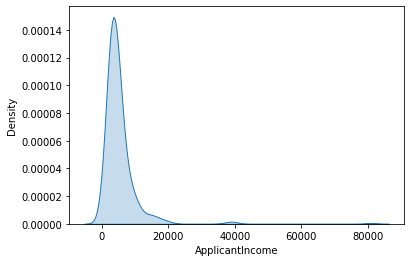

In [ ]:
sns.kdeplot(data=loan_data_no_missing, x='ApplicantIncome', fill=True)

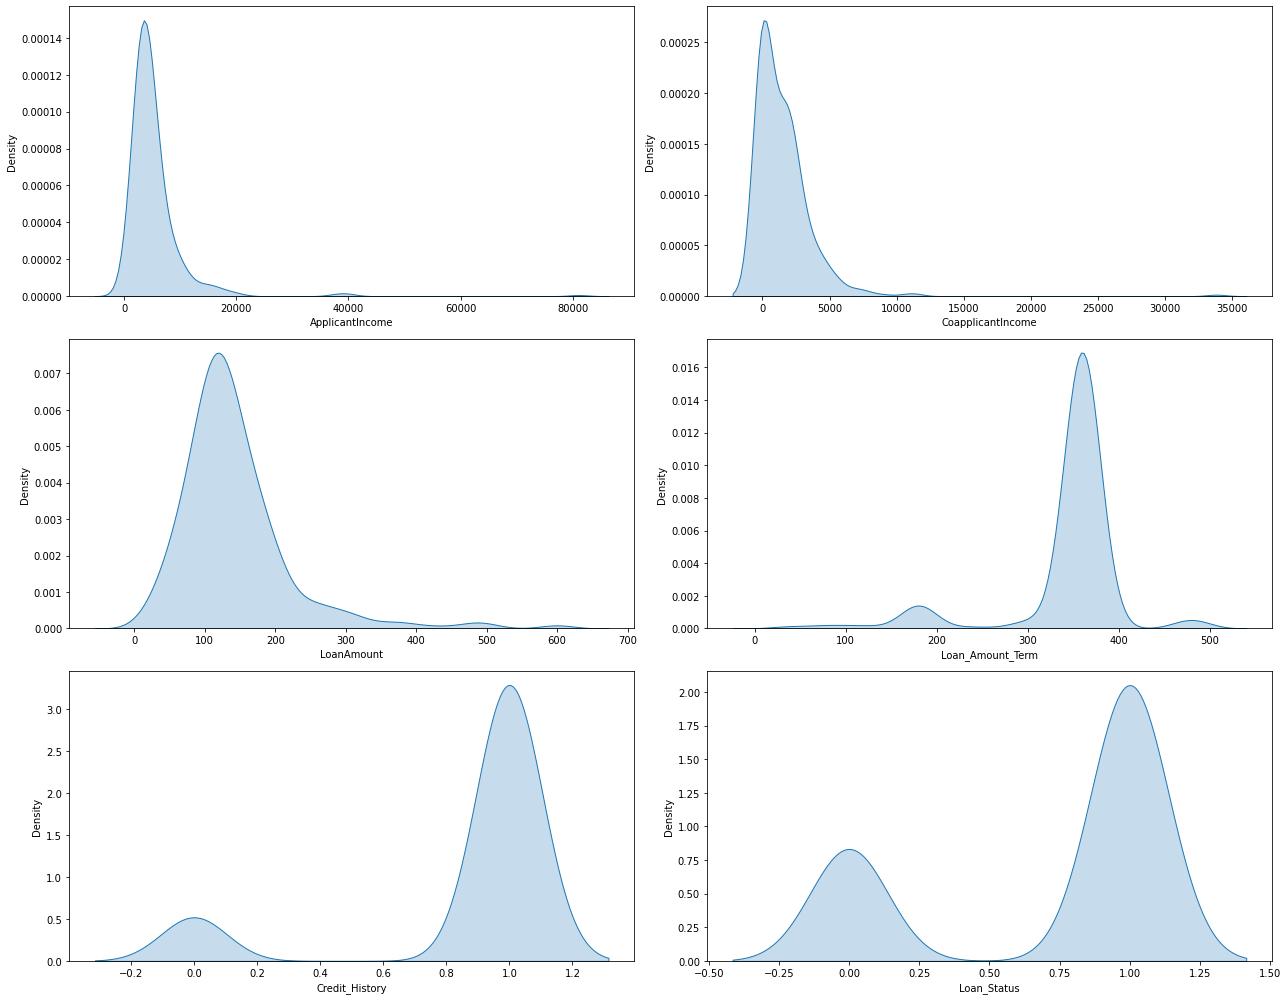

In [ ]:
num_cols = loan_data_no_missing.select_dtypes(include=['float64','int64']).columns.to_list()

fig, axes = plt.subplots(3,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=loan_data_no_missing, x=col, ax=axes[i], fill=True) 
plt.tight_layout()

### Categorical Variables

In [ ]:
clean = loan_data_no_missing.iloc[:,1:]
clean.select_dtypes(include=['object']).columns.to_list()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

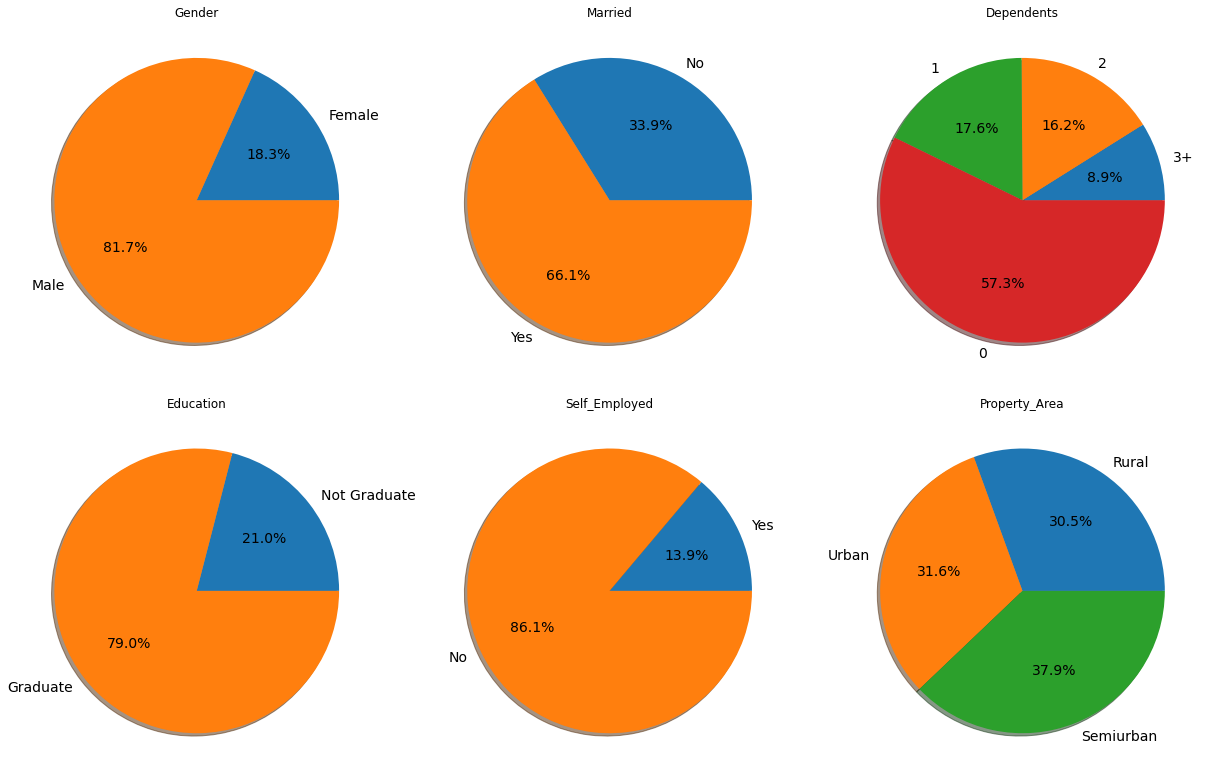

In [ ]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

fig, axes = plt.subplots(2,3, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _ = data[col].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _ = axes[i].set_ylabel('')

_ = plt.tight_layout()

### Correlation for the numerical variables

In [ ]:
loan_data_no_missing.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.085755,0.504397,-0.025685,-0.076768,-0.037624
CoapplicantIncome,-0.085755,1.000000,0.182372,-0.004226,-0.036569,-0.047018
LoanAmount,0.504397,0.182372,1.000000,0.055095,-0.057763,-0.056931
Loan_Amount_Term,-0.025685,-0.004226,0.055095,1.000000,0.037315,0.017478
Credit_History,-0.076768,-0.036569,-0.057763,0.037315,1.000000,0.522784
Loan_Status,-0.037624,-0.047018,-0.056931,0.017478,0.522784,1.000000


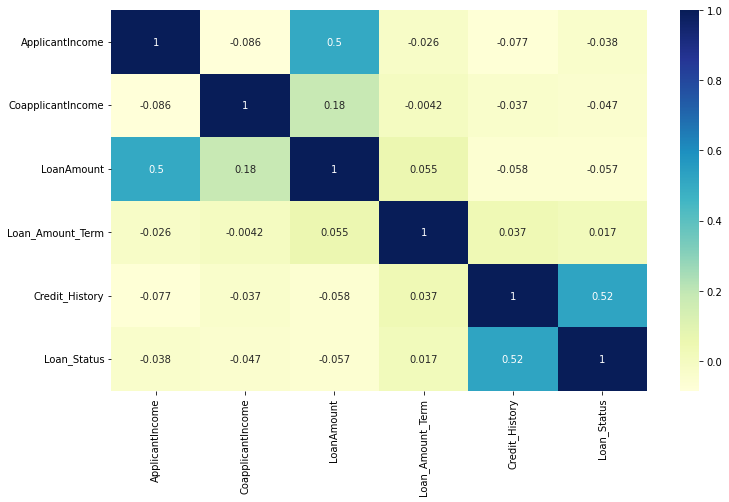

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(loan_data_no_missing.corr(), cmap='YlGnBu', annot=True) 
plt.show()

## Data Pre-processing

### Imputing Null Values

In [ ]:
gender = data[['Gender']]
gender

,Gender
0,Female
1,Male
2,Female
3,Male
4,Male
...,...
486,NaN
487,Female
488,Male
489,Male


In [ ]:
gender = data[['Gender']]

# experiment
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #step 1
mean_imputer = mean_imputer.fit(data[['Gender']])
gender['Gender'] = mean_imputer.transform(gender[['Gender']])
gender

,Gender
0,Female
1,Male
2,Female
3,Male
4,Male
...,...
486,Male
487,Female
488,Male
489,Male


In [ ]:
#impute the missing values
#categorical variable + binary variable
cat_var = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent') ## fill the code
for i in cat_var:
  mean_imputer = mean_imputer.fit(data[[i]])
  data[i] = mean_imputer.transform(data[[i]])

#numerical variable
num_var = ['LoanAmount','Loan_Amount_Term']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') ## fill the code
for i in num_var:
  mean_imputer = mean_imputer.fit(data[[i]])
  data[i] = mean_imputer.transform(data[[i]])

#show null values and its percentage
checking_null_values(data)

Dimension of the dataset (491, 12)


,Columns Type,Amount of Null Values,Percentage null values
Gender,object,0,0.0
Married,object,0,0.0
Dependents,object,0,0.0
Education,object,0,0.0
Self_Employed,object,0,0.0
ApplicantIncome,int64,0,0.0
CoapplicantIncome,float64,0,0.0
LoanAmount,float64,0,0.0
Loan_Amount_Term,float64,0,0.0
Credit_History,float64,0,0.0


### Encoding data point

In [ ]:
#performing one-hot encoding
print('Before doing one-hot encoding',data.shape)
data_dumm = pd.get_dummies(data, prefix_sep='_') ## fill the code
print('Before doing one-hot encoding',data_dumm.shape)
data_dumm.head()

Before doing one-hot encoding (491, 12)
Before doing one-hot encoding (491, 21)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.000000,1.0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.000000,1.0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.000000,1.0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,341.297071,1.0,1,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.000000,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0


## Modelling

In [ ]:
#Separate the target and independent variable
X = data_dumm.drop(columns='Loan_Status') #fill the code
y = data_dumm['Loan_Status'] #fill the code

#Perform train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) #fill the code

In [ ]:
X_train.shape

(392, 20)

In [ ]:
X_test.shape

(99, 20)

In [ ]:
80/100*491

392.8

In [ ]:
def evaluation_metrics(model):
  """
  Evaluation metrics for classification ML project
  """
  y_predict_train = model.predict(X_train)
  y_predict_test = model.predict(X_test)

  training_acc = accuracy_score(y_train, y_predict_train) #fill the code
  testing_acc = accuracy_score(y_test, y_predict_test) #fill the code

  print("Training Accuracy: {}".format(training_acc))
  print("Testing Accuracy: {}".format(testing_acc))

  print(classification_report(y_test, y_predict_test))

In [ ]:
# Evaluation metrics using ROC curve [Optional]
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

### Simple Model

In [ ]:
# Logistic Regression
lr = LogisticRegression() 
lr.fit(X_train, y_train) ## fill the code

evaluation_metrics(lr)

Training Accuracy: 0.798469387755102
Testing Accuracy: 0.8383838383838383
              precision    recall  f1-score   support

           0       0.93      0.48      0.64        29
           1       0.82      0.99      0.90        70

    accuracy                           0.84        99
   macro avg       0.88      0.73      0.77        99
weighted avg       0.85      0.84      0.82        99



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) ## fill the code

evaluation_metrics(dt)

Training Accuracy: 1.0
Testing Accuracy: 0.6565656565656566
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        29
           1       0.76      0.76      0.76        70

    accuracy                           0.66        99
   macro avg       0.59      0.59      0.59        99
weighted avg       0.66      0.66      0.66        99



In [ ]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train) ## fill the code

evaluation_metrics(gb)

Training Accuracy: 0.9030612244897959
Testing Accuracy: 0.797979797979798
              precision    recall  f1-score   support

           0       0.80      0.41      0.55        29
           1       0.80      0.96      0.87        70

    accuracy                           0.80        99
   macro avg       0.80      0.69      0.71        99
weighted avg       0.80      0.80      0.78        99



### Model + Hyperparameter Tuning

In [ ]:
# Random forest classifier [Optional]
lr = LogisticRegression()

param_dist =    [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(lr, param_grid=param_dist, cv = 5) ## fill the code

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

LogisticRegression(C=1.623776739188721, penalty='l1', solver='liblinear')

In [ ]:
evaluation_metrics(grid_objt)

Training Accuracy: 0.8075801749271136
Testing Accuracy: 0.831081081081081
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.82      0.98      0.89       105

    accuracy                           0.83       148
   macro avg       0.86      0.72      0.75       148
weighted avg       0.84      0.83      0.81       148



In [ ]:
y_prob = grid_objt.predict_proba(X_test)

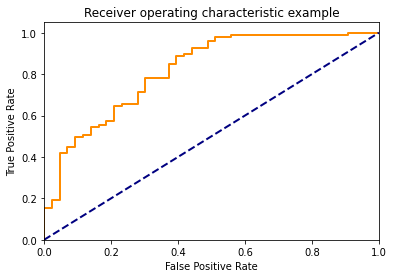

0.7230343300110742

In [ ]:
roc_curve_plot(y_test, y_prob)